<a href="https://colab.research.google.com/github/sittinispa123/Hello_world/blob/master/ANN_Dried_Chili_Pepper_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Dried Chili Pepper Classification
---
### Kelompok 6 - UAS Kecerdasan Buatan
1. Ifal Fahri A - F55122061
2. Raihan Aryaputra Anwar - F55122067
3. Diva Dwicitra Dewi - F55122049
4. Sitti Nispa - F55122046
5. Royan Al Qois - F55121052
---

Dibuat berdasarkan paper : <br>
**A novel method for dried chili pepper classification using artificial intelligence**

---
Dataset dibuat sendiri mengambil sumber dari dokumen UNECE (United Nation Economic Commission for Europe), dan diatur serta dirapikan menggunakan figma






In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from PIL import Image

In [ ]:
# Metode untuk mengubah gambar menjadi histogram
def calculate_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [ ]:
# Persiapan database gambar
data_dir = "/content/drive/MyDrive/Dataset/driedchili"  # Ubah dengan path folder gambar di Google Colab
classes = ['extra', 'first', 'second']
num_images_per_class = 6

In [ ]:
images = []
labels = []

In [ ]:
for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_dir)[:num_images_per_class]
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        image = Image.open(image_path)
        image = np.array(image)  # Konversi gambar menjadi array NumPy
        images.append(image)
        labels.append(i)

In [ ]:
# Mengubah list menjadi array NumPy
images = np.array(images)
labels = np.array(labels)

<ipython-input-43-b46c877980f5>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


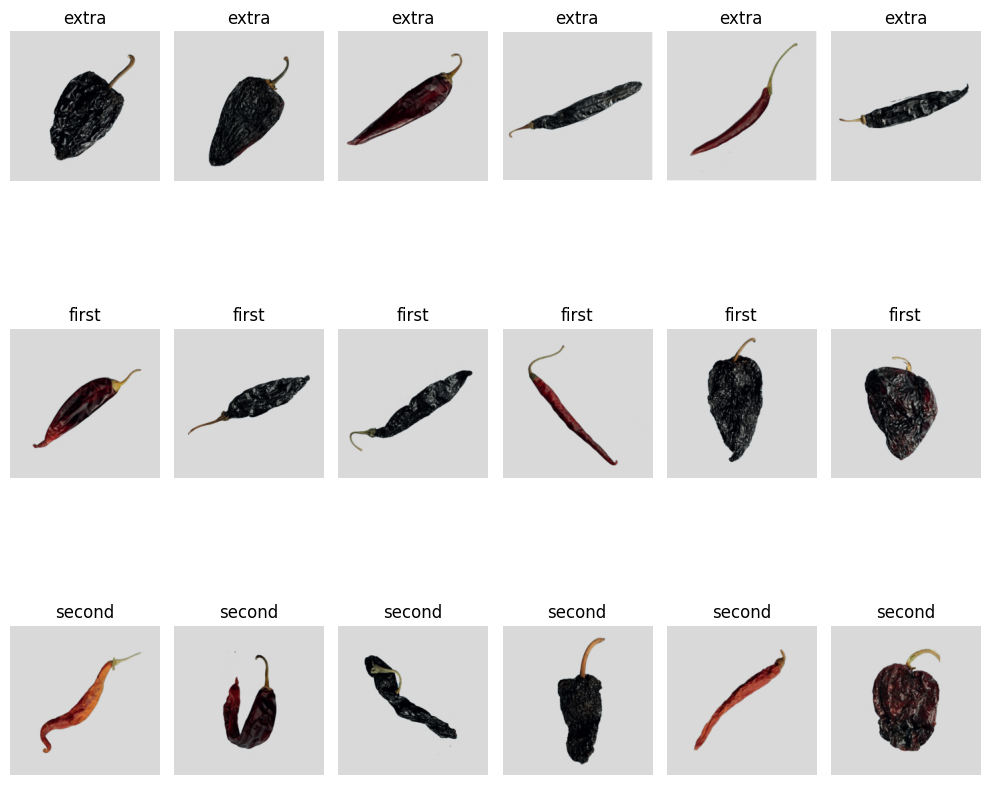

In [ ]:
# Tampilkan dataset beserta labelnya
fig, axs = plt.subplots(len(classes), num_images_per_class, figsize=(10, 10))
for i in range(len(classes)):
    for j in range(num_images_per_class):
        axs[i, j].imshow(images[i * num_images_per_class + j])
        axs[i, j].axis('off')
        axs[i, j].set_title(classes[i])
plt.tight_layout()
plt.show()

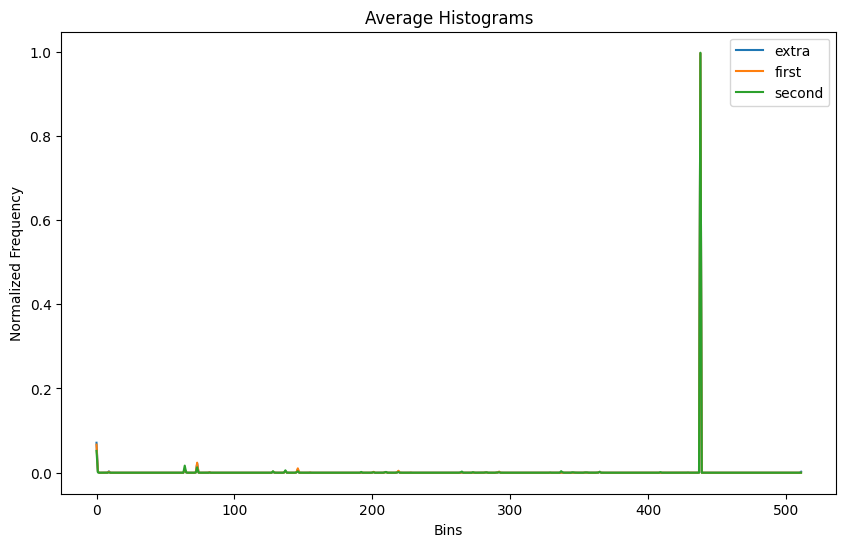

In [ ]:
# Calculate and display the histogram
histograms = [calculate_histogram(image) for image in images]
histograms = np.array(histograms) / np.max(histograms)

plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    class_histograms = histograms[labels == i]
    class_mean_histogram = np.mean(class_histograms, axis=0)
    plt.plot(class_mean_histogram, label=classes[i])
plt.xlabel('Bins')
plt.ylabel('Normalized Frequency')
plt.title('Average Histograms')
plt.legend()
plt.show()

In [ ]:
# Normalisasi histogram
histograms = np.array(histograms) / np.max(histograms)

In [ ]:
# Membangun model Artificial Neural Network (ANN)
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(histograms.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

In [ ]:
# Mengompilasi dan melatih model ANN
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(histograms, labels, epochs=20, batch_size=32)

Epoch 1/20
1/1 [==============================] - 1s 709ms/step - loss: 1.0991 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 15ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 0s 14ms/step - loss: 1.0984 - accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 0s 22ms/step - loss: 1.0980 - accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 0s 17ms/step - loss: 1.0976 - accuracy: 0.4444
Epoch 6/20
1/1 [==============================] - 0s 15ms/step - loss: 1.0973 - accuracy: 0.3333
Epoch 7/20
1/1 [==============================] - 0s 16ms/step - loss: 1.0970 - accuracy: 0.3333
Epoch 8/20
1/1 [==============================] - 0s 15ms/step - loss: 1.0966 - accuracy: 0.3333
Epoch 9/20
1/1 [==============================] - 0s 15ms/step - loss: 1.0963 - accuracy: 0.3889
Epoch 10/20
1/1 [==============================] - 0s 15ms/step - loss: 1.0959 - accuracy: 0.3889
Epoch 11/20
1/1 [===========

In [ ]:
# Metode untuk mengklasifikasikan gambar menggunakan model ANN
def classify_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)  # Convert the image to a NumPy array
    hist = calculate_histogram(image)
    hist = hist / np.max(hist)
    hist = np.expand_dims(hist, axis=0)
    prediction = model.predict(hist)
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]
    return predicted_class, predicted_class_index

1/1 [==============================] - 0s 28ms/step


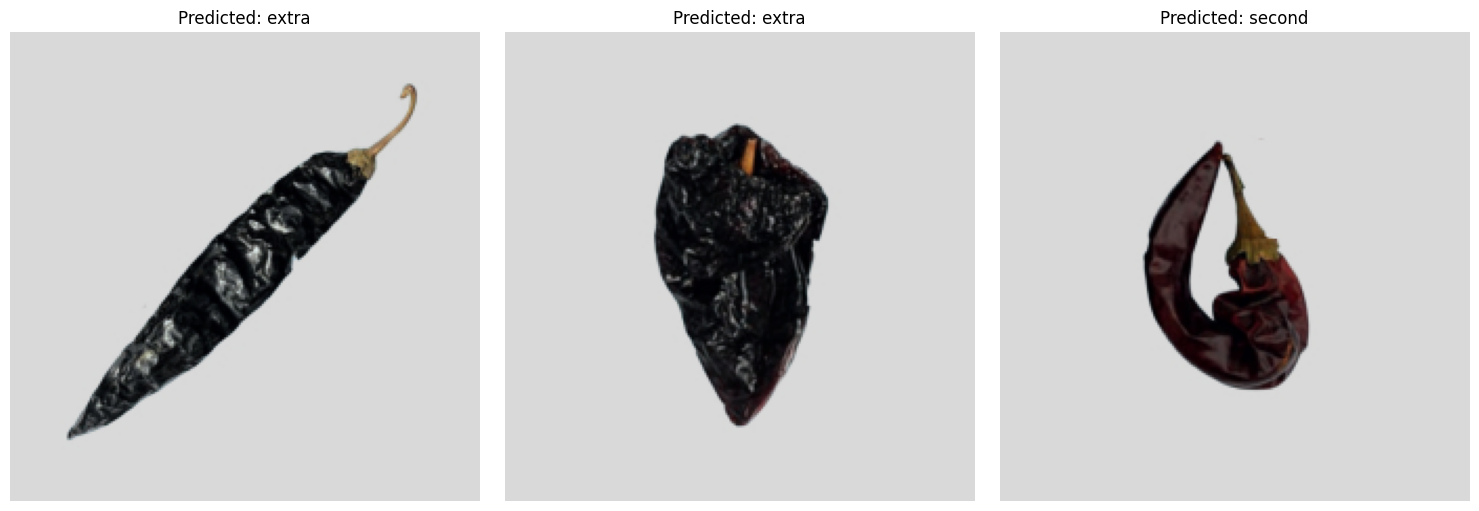

In [ ]:
# Test with example images
test_images = [
    '/content/drive/MyDrive/Dataset/driedchili/test/test1.jpg',  # Change to the path of the first test image
    '/content/drive/MyDrive/Dataset/driedchili/test/test2.jpg',  # Change to the path of the second test image
    '/content/drive/MyDrive/Dataset/driedchili/test/test3.jpg'   # Change to the path of the third test image
]

fig, axs = plt.subplots(1, len(test_images), figsize=(15, 5))
for i, test_image in enumerate(test_images):
    predicted_class, predicted_class_index = classify_image(test_image)
    image = Image.open(test_image)
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f'Predicted: {predicted_class}')
plt.tight_layout()
plt.show()